In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

#implementa melhorias de visualização (opcional)
import seaborn as sns
sns.set()

In [2]:
#arquivo csv com todas as decisões assinaladas como "Direito Penal" ou "Direito Processual Penal"
data = pd.read_csv('data_criminal')
print('Número de documentos assinaladas como "Direito Penal" ou "Direito Processual Penal: ', len(data))

#arquivo csv com metadados dos documentos acima (data, ano, decisão monogrática e ramo do Direito)
meta = pd.read_csv('metadata_criminal')

#arquivo csv com metadados de todos os documentos que citam alguma Súmula Vinculante, independente do ramo do Direito
meta_bp = pd.read_csv('metadata.csv')

Número de documentos assinaladas como "Direito Penal" ou "Direito Processual Penal:  151765


In [3]:
#metadados das decisões anteriores a criação da SV 26
meta_menor_2009 = meta[meta['year'] < 2009]

#metadados das decisões posteriores a criação da SV 26
meta_maior_2009 = meta[meta['year'] >= 2009]

In [4]:
#cria em 'titles' lista de todos os documentos que citam a SV 26
titles = []
bps = list(meta_bp['bp'])
list_names = meta_bp['doc_id']
for i, bp in enumerate(bps):
    if '26' in bp:
        titles.append(list_names[i])
print('Número total de documentos que citam a SV 26: ', len(titles))

Número total de documentos que citam a SV 26:  954


In [5]:
#seleciona os textos marcados como "Direito Penal" ou "Direito Processual Penal" que citam a SV 26
texts_26 = data[data['title'].isin(titles)]
meta_26 = meta[meta['title'].isin(titles)]
print('Número total de documentos de "Direito Penal" ou "Direito Processual Penal" que citam a SV 26: ', len(texts_26))

Número total de documentos de "Direito Penal" ou "Direito Processual Penal" que citam a SV 26:  565


In [6]:
#seleciona os textos marcados como "Direito Penal" ou "Direito Processual Penal" que *não* citam a SV 26
texts_n_26 = data[~data['title'].isin(titles)]
print('Número total de documentos de "Direito Penal" ou "Direito Processual Penal" que não citam a SV 26: ', len(texts_n_26))

Número total de documentos de "Direito Penal" ou "Direito Processual Penal" que não citam a SV 26:  151200


In [7]:
#implementa estimadores do tau de Kendall
import scipy.stats as stats

In [8]:
#aumenta a fonte padrão de todos os labels nos gráficos daqui para frente
plt.rc('axes', labelsize= 14)    
plt.rc('xtick', labelsize=14)   
plt.rc('ytick', labelsize=14)    
plt.rc('legend', fontsize=14) 

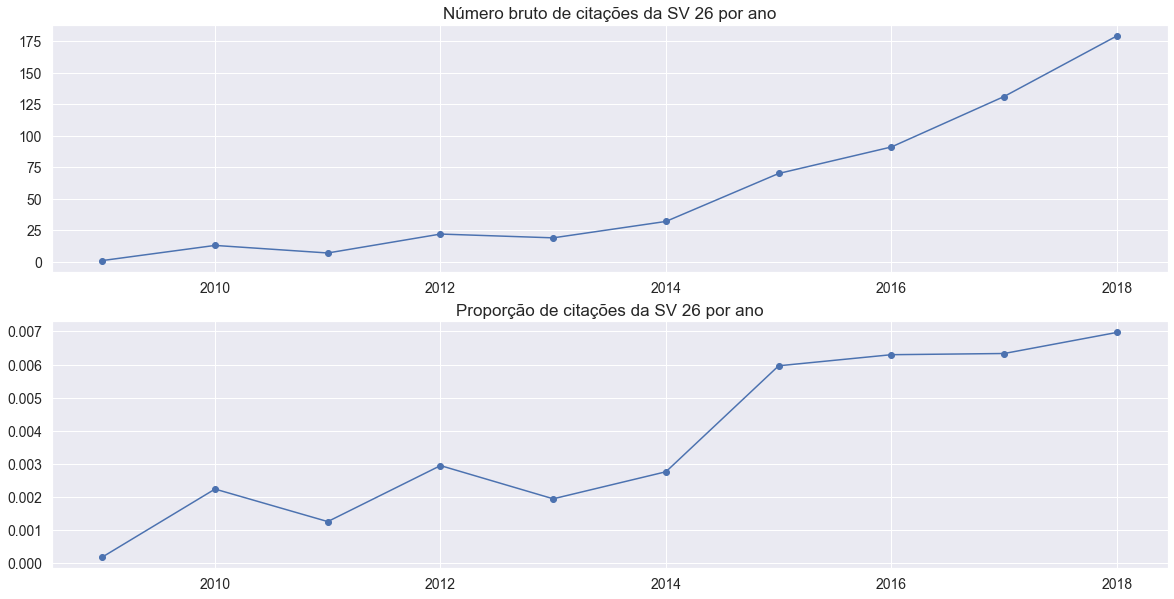

In [9]:
#faz gráfico de números de citações da SV 26 por ano e sua proporção
occ_year = []
freq_year = []

#como 2009 foi o ano de criação da SV 26, começamos por esse ano
for year in range(2009,2019):
    occ_year.append(len(meta_26[meta_26['year']== year]))
    freq_year.append(len(meta_26[meta_26['year']== year])/len(meta[meta['year']== year]))

fig, axs = plt.subplots(2, figsize = (20, 10))
axs[0].plot(list(range(2009,2019)), occ_year, '-o')
axs[0].set_title('Número bruto de citações da SV 26 por ano', fontsize = 17)

axs[1].plot(list(range(2009,2019)), freq_year, '-o')
axs[1].set_title('Proporção de citações da SV 26 por ano', fontsize = 17)

plt.savefig('series.png')
plt.show()

In [10]:
#coloca o tipo de documento para cada um dos que citam a SV 26
types = []
for text in meta_26['title']:
    types.append(text.split('_')[1].upper())
meta_26['doc_type'] = types
set_types = set(types)
print(set_types)

{'RCL', 'HC', 'RHC', 'ARE', 'AI', 'PSV', 'RE'}


<ipython-input-10-78c3bf1cf780>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_26['doc_type'] = types


In [11]:
defen = []
for text in texts_26['raw_text']:
    text = text.lower()
    #como não queremos citações indiretas à defensoria, vemos só no ínicio do documento onde se
    #consta as partes, assim ignorando o resto do texto
    text = text[:1000]
    if ('defensor' in text) and ('são paulo' in text or 'sp' in text or 's.p' in text):
        defen.append(1)
    else:
        defen.append(0)
meta_26['def_sp'] = defen
texts_26['def_sp'] = defen

<ipython-input-11-e42bc80eb7c3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_26['def_sp'] = defen
<ipython-input-11-e42bc80eb7c3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts_26['def_sp'] = defen


In [12]:
#podemos testar se apenas casos da defensoria de São Paulo foram escolhidos
print(texts_26[texts_26['def_sp'] == 1]['raw_text'].iloc[123][:500])

RECLAMAÇÃO 10.034 SÃO PAULO

RELATOR : MIN. TEORI ZAVASCKI
RECLTE.(S) :DEFENSORIA PÚBLICA DO ESTADO DE SÃO 

PROC.(A/S)(ES) :DEFENSOR PÚBLICO-GERAL DO ESTADO DE SÃO 

PAULO 

PAULO 

RECLDO.(A/S) :TRIBUNAL DE JUSTIÇA DO ESTADO DE SÃO 

PAULO 

INTDO.(A/S) :ADRIANO BORGES DE PAIVA 

DECISÃO: 
1. Trata-se de reclamação, com pedido de liminar, proposta contra 
acórdão do Tribunal de Justiça de São Paulo, sob fundamento de que teria 
desrespeitado o teor da súmula vinculante 26. 

A liminar foi inde


In [13]:
#salva as tabelas em CSV 
meta_26.to_csv('meta_26.csv')
texts_26.to_csv('texts_26.csv')

In [14]:
#o número de documentos e porcentagens de documentos da defensoria publica de São Paulo
print(sum(meta_26['def_sp']), sum(meta_26['def_sp'])/len(meta_26))

360 0.6371681415929203


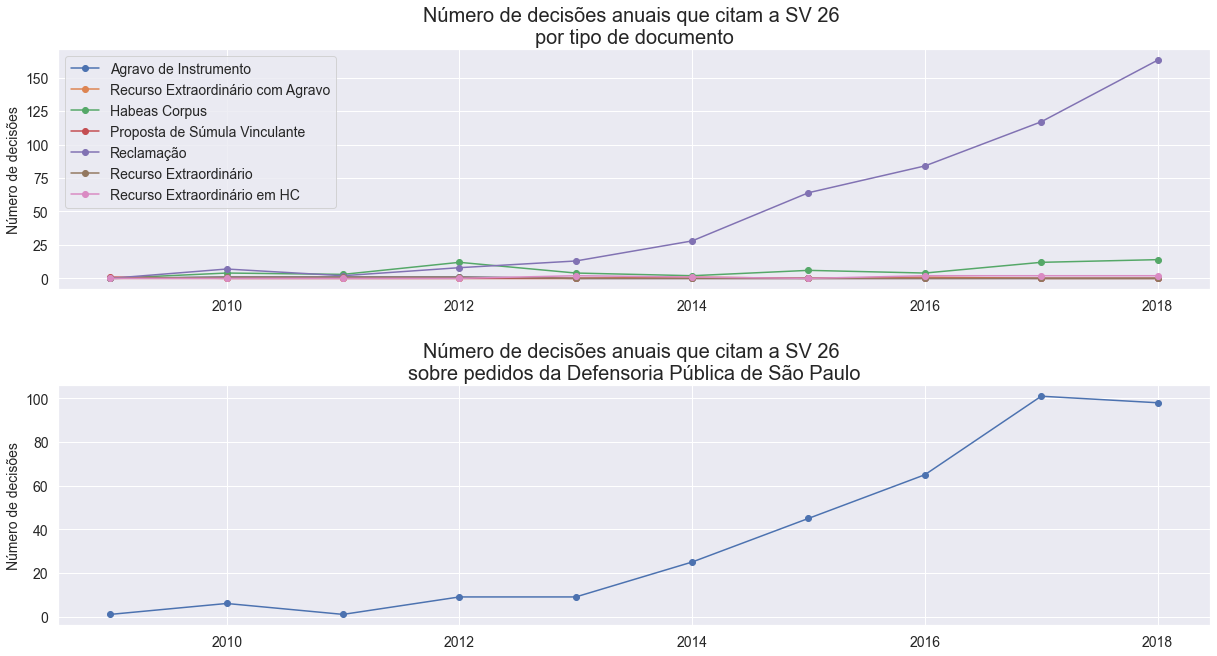

In [15]:
#faz plot de número de citações por tipo de documento por ano
ai = []
are = []
hc = []
psv = []
rcl = []
re = []
rhc = []
defensoria = []

#para cada tipo de documento, calcula as citações por ano
for year in range(2009,2019):
    ai.append(len(meta_26[(meta_26['year']== year) & (meta_26['doc_type'] == 'AI')]))
    are.append(len(meta_26[(meta_26['year']== year) & (meta_26['doc_type'] == 'ARE')]))
    hc.append(len(meta_26[(meta_26['year']== year) & (meta_26['doc_type'] == 'HC')]))
    psv.append(len(meta_26[(meta_26['year']== year) & (meta_26['doc_type'] == 'PSV')]))
    rcl.append(len(meta_26[(meta_26['year']== year) & (meta_26['doc_type'] == 'RCL')]))
    re.append(len(meta_26[(meta_26['year']== year) & (meta_26['doc_type'] == 'RE')]))
    rhc.append(len(meta_26[(meta_26['year']== year) & (meta_26['doc_type'] == 'RHC')]))
    defensoria.append(len(meta_26[(meta_26['year']== year) & (meta_26['def_sp'] == 1)]))

fig, axs = plt.subplots(2, figsize = (20, 10))

axs[0].plot(list(range(2009,2019)), ai, '-o', label = 'Agravo de Instrumento')
axs[0].plot(list(range(2009,2019)), are, '-o', label = 'Recurso Extraordinário com Agravo')
axs[0].plot(list(range(2009,2019)), hc, '-o', label = 'Habeas Corpus')
axs[0].plot(list(range(2009,2019)), psv, '-o', label = 'Proposta de Súmula Vinculante')
axs[0].plot(list(range(2009,2019)), rcl, '-o', label = 'Reclamação')
axs[0].plot(list(range(2009,2019)), re, '-o', label = 'Recurso Extraordinário')
axs[0].plot(list(range(2009,2019)), rhc, '-o', label = 'Recurso Extraordinário em HC')
axs[0].set_ylabel('Número de decisões')
axs[0].set_title('Número de decisões anuais que citam a SV 26 \npor tipo de documento', fontsize = 20)
axs[0].legend()

axs[1].plot(list(range(2009,2019)), defensoria, '-o')
axs[1].set_title('Número de decisões anuais que citam a SV 26 \nsobre pedidos da Defensoria Pública de São Paulo', fontsize = 20)
axs[1].set_ylabel('Número de decisões')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig('serie_tipo_defen.png', bbox_inches = 'tight')
plt.show()

In [16]:
#versão em Sci-kit learn de TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#importa algoritmo para validação cruzada
from sklearn.model_selection import cross_val_score

#importa algoritmo de escolha de melhor modelo
from sklearn.model_selection import GridSearchCV

#importa pipeline para utilização sequencial vetorização + modelo
from sklearn.pipeline import make_pipeline

#importa regressão logística
from sklearn.linear_model import LogisticRegression

#utiliza a mesma seed para ter resultados iguais sempre que rodar o notebook
seed = 0
import random 
random.seed(seed)

#importa as stop words em português, isto é, palavras a ser ignoradas pelo vetorizador
from nltk.corpus import stopwords
pt_stp_words = stopwords.words('portuguese')

In [17]:
#modificação da função .tools.visualize_coefficients de mglearn para português
#https://github.com/amueller/mglearn/tree/master/mglearn

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['r' if c < 0 else 'b'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Magnitude do coeficiente", fontsize = 13)
    plt.xlabel("Palavra", fontsize = 13)
    plt.savefig('coefs.png')

In [18]:
X1 = list(texts_26['raw_text'])

#faz uma lista de índices dos documentos que não citam a SV 26
indexes_n_26 = list(range(0, len(texts_n_26)))

#escolhe uma amostra de mesmo tamanho de documentos que não citam a SV 26
indexes_X0 = random.sample(indexes_n_26, len(X1))
X0 = list(texts_n_26.iloc[indexes_X0]['raw_text'])

#escolhe uma amostra três vezes maior de documentos que não citam a SV 26 para fazer ensemble, sendo assim
#de mesmo tamanho cada componente do ensemble
indexes_X0_ensemble = random.sample(indexes_n_26, 3*len(X1))
X0_ensemble = list(texts_n_26.iloc[indexes_X0_ensemble]['raw_text'])

print('Tamnho X1: ', len(X1))
print('Tamnho X0: ', len(X0))
print('Tamnho X0_ensemble: ', len(X0_ensemble))

Tamnho X1:  565
Tamnho X0:  565
Tamnho X0_ensemble:  1695


In [19]:
def masker(dataset, list_of_masked):
    '''Mascara as palavras dos textos em 'dataset' presente em 'list_of_masked' por uma string vazia
    Input:  dataset = dataset de textos; list_of_masked = lista de palavras para mascarar
    Output: o mesmo dataset de texto, mas com palavras mascaradas'''
    masked_set = []
    for index in range(len(dataset)):
        new_string = ''
        
        #separa o documento em uma lista sequencial de palavras 
        splitted_doc = dataset[index].split()
        for word in range(len(splitted_doc)):
            if splitted_doc[word] in list_of_masked:
                new_string += ''
            else:
                new_string += ' '+ splitted_doc[word]
        masked_set.append(new_string)
    return masked_set

In [20]:
#lista de palavras para mascarar
words_to_mask = ['SV', 'S.V.', 'S.V', 'SV.', 'sv','s.v.', 's.v', 'sv.',
                 'Súmula', 'SÚMULA', 'Vinculante', 'vinculante', 'VINCULANTE', 'Vinc.', 'VINC.', 'Vinc']

In [21]:
#como os números não devem ser fatores importantes na detetminação de possível citação da SV, mascaramos eles 
#também
def numeric_masker(dataset):
    '''Mascara os números inteiros dos textos em 'dataset'
    Input: dataset = dataset de textos
    Output: o mesmo dataset de texto, mas com números mascarados'''
    masked_set = []
    for index in range(len(dataset)):
        new_string = ''
        for word in range(len(dataset[index])):
            if dataset[index][word].isnumeric()==False:
                new_string += dataset[index][word]
            else:
                new_string += ''
        masked_set.append(new_string)
    return masked_set

In [22]:
X1 = numeric_masker(masker(X1, words_to_mask))
X0 = numeric_masker(masker(X0, words_to_mask))
X0_ensemble = numeric_masker(masker(X0_ensemble, words_to_mask))

In [23]:
X = X0 + X1
#faz a lista de classes
y = [0 for i in range(len(X0))] + [1 for i in range(len(X1))]

param_grid_log = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
#modelo com TF IDF e regressão logística
modelo_log_tf = make_pipeline(TfidfVectorizer(stop_words = pt_stp_words), LogisticRegression())
#realiza a procura do parâmetro com validação cruzada de 5-folds
grid_log_tf = GridSearchCV(modelo_log_tf, param_grid_log, cv = 5)
grid_log_tf.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words=['a', 'à',
                                                                    'ao', 'aos',
                                                                    'aquela',
                                                                    'aquelas',
                                                                    'aquele',
                                                                    'aqueles',
                                                                    'aquilo',
                                                                    'as', 'às',
                                                                    'até',
                                                                    'com',
                                                                    'como',
                                                                 

In [24]:
X_1 = X0_ensemble[:len(X1)] + X1
X_2 = X0_ensemble[len(X1):2*len(X1)] + X1
X_3 = X0_ensemble[2*len(X1):] + X1

#modelo com TF IDF e regressão logística com esnemble
modelo_log_tf_ens_1 = make_pipeline(TfidfVectorizer(stop_words = pt_stp_words), LogisticRegression())
grid_log_tf_1 = GridSearchCV(modelo_log_tf_ens_1, param_grid_log, cv = 5)
grid_log_tf_1.fit(X_1, y)

modelo_log_tf_ens_2 = make_pipeline(TfidfVectorizer(stop_words = pt_stp_words), LogisticRegression())
grid_log_tf_2 = GridSearchCV(modelo_log_tf_ens_2, param_grid_log, cv = 5)
grid_log_tf_2.fit(X_2, y)

modelo_log_tf_ens_3 = make_pipeline(TfidfVectorizer(stop_words = pt_stp_words), LogisticRegression())
grid_log_tf_3 = GridSearchCV(modelo_log_tf_ens_3, param_grid_log, cv = 5)
grid_log_tf_3.fit(X_3, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words=['a', 'à',
                                                                    'ao', 'aos',
                                                                    'aquela',
                                                                    'aquelas',
                                                                    'aquele',
                                                                    'aqueles',
                                                                    'aquilo',
                                                                    'as', 'às',
                                                                    'até',
                                                                    'com',
                                                                    'como',
                                                                 

In [25]:
print("Melhor erro de validação cruzada para TF IDF e regressão logística: {:.2f}".format(grid_log_tf.best_score_))

print("\n\n\nMelhor erro de validação cruzada para TF IDF e regressão logística, ensemble 1: {:.2f}".format(grid_log_tf_1.best_score_))
print("Melhor erro de validação cruzada para TF IDF e regressão logística, ensemble 2: {:.2f}".format(grid_log_tf_2.best_score_))
print("Melhor erro de validação cruzada para TF IDF e regressão logística, ensemble 3: {:.2f}".format(grid_log_tf_3.best_score_))

Melhor erro de validação cruzada para TF IDF e regressão logística: 0.98



Melhor erro de validação cruzada para TF IDF e regressão logística, ensemble 1: 0.97
Melhor erro de validação cruzada para TF IDF e regressão logística, ensemble 2: 0.97
Melhor erro de validação cruzada para TF IDF e regressão logística, ensemble 3: 0.97


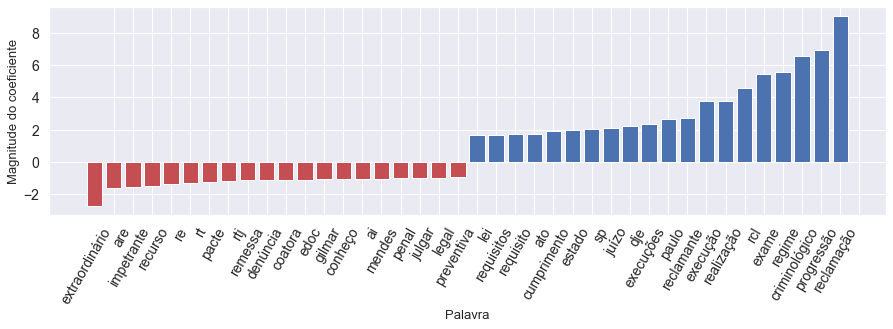

In [26]:
#transforma as palavras em vetores
vectorizer = grid_log_tf.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(X)

# acha as palavras que mais têm impacto no modelo
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

#faz o plot de barras
visualize_coefficients(grid_log_tf.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features= 20)

In [27]:
#agora faremos os mesmos cálculos com os melhores parâmetros estimados no último passo
vectorizer_1 = TfidfVectorizer(stop_words = pt_stp_words)
X_1 = vectorizer_1.fit_transform(X_1)

vectorizer_2 = TfidfVectorizer(stop_words = pt_stp_words)
X_2 = vectorizer_2.fit_transform(X_2)

vectorizer_3 = TfidfVectorizer(stop_words = pt_stp_words)
X_3 = vectorizer_3.fit_transform(X_3)

In [28]:
#transforma todos os textos em vetores pelos modelos de TF IDF criados pelo vocabulário de treinamento de cada
#componente do ensemble
corpus_1 = vectorizer_1.transform(list(data['raw_text']))
print('ok')
corpus_2 = vectorizer_2.transform(list(data['raw_text']))
print('ok')
corpus_3 = vectorizer_3.transform(list(data['raw_text']))

ok
ok


In [29]:
#performa as três regressões logísticas de ensemble com os melhores parâmetros
log1 = LogisticRegression(C = grid_log_tf_1.best_params_['logisticregression__C']).fit(X_1, y)
log2 = LogisticRegression(C = grid_log_tf_2.best_params_['logisticregression__C']).fit(X_2, y)
log3 = LogisticRegression(C = grid_log_tf_3.best_params_['logisticregression__C']).fit(X_3, y)

In [30]:
prob_log_1 =  log1.predict_proba(corpus_1)
prob_log_2 =  log2.predict_proba(corpus_2)
prob_log_3 =  log3.predict_proba(corpus_3)

In [31]:
prob_log = (prob_log_1[:,1] + prob_log_2[:,1] + prob_log_3[:,1])/3

In [32]:
titles_all = list(data['title'])
date = list(meta['date'])
year = list(meta['year'])

d = {'title': titles_all, 'date':date, 'year':year, 'log': prob_log}
predictions = pd.DataFrame(data = d)

In [33]:
predbf = predictions[predictions['year'] <= 2009]

In [34]:
predbf

,title,date,year,log
82,20080508_Inq_2591_533747,2008-05-08,2008,0.038266
83,20091027_AI_767053_606248,2009-10-27,2009,0.010055
84,20050222_HC_85289_79824,2005-02-22,2005,0.043473
85,20090623_AI_749660_601109,2009-06-23,2009,0.010948
86,20080814_AO_1464_565641,2008-08-14,2008,0.051976
...,...,...,...,...
151444,19970903_HC_75839_465692,1997-09-03,1997,0.028081
151445,20021127_AI_415428_311089,2002-11-27,2002,0.008290
151446,20010424_RE_263012_348992,2001-04-24,2001,0.017520
151447,20000222_HC_79798_78156,2000-02-22,2000,0.228549


In [35]:
pred_texts = predbf[predbf['log'] > 0.5]

In [36]:
pred_texts

,title,date,year,log
191,19940426_HC_71018_72836,1994-04-26,1994,0.598826
559,20071130_AI_498274_2625691,2007-11-30,2007,0.597961
2731,20080605_Rcl_6084_2824830,2008-06-05,2008,0.600066
2864,20080513_RE_550047_2788678,2008-05-13,2008,0.604810
2920,20080425_RE_495076_2750132,2008-04-25,2008,0.519142
...,...,...,...,...
148324,20060502_HC_87082_1959277,2006-05-02,2006,0.601992
149543,20060306_HC_84520_1925609,2006-03-06,2006,0.511757
149577,20060516_AI_588800_1964252,2006-05-16,2006,0.678169
150007,20060531_AI_580357_1972733,2006-05-31,2006,0.524287


In [37]:
predicted_bfsv26 = data[data['title'].isin(pred_texts['title'])]

In [38]:
predicted_bfsv26.to_csv('predictions_before26_all.csv')

In [39]:
['Rondônia',
 'Acre',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Paraná',
 'Santa Catarina',
 'Rio Grande do Sul',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal']

['Rondônia',
 'Acre',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Paraná',
 'Santa Catarina',
 'Rio Grande do Sul',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal']

In [41]:
predicted_bfsv26

,title,raw_text
191,19940426_HC_71018_72836,01748030\n03490710\n00181000\n00000150\n\n-002...
559,20071130_AI_498274_2625691,DECISÃO: Trata-se de agravo de instrumento con...
2731,20080605_Rcl_6084_2824830,DECISÃO:\n\nRECLAMAÇÃO. REPETIÇÃO DE ARGUMENTO...
2864,20080513_RE_550047_2788678,DECISÃO\n\nVistos.\n\nO Ministério Público do ...
2920,20080425_RE_495076_2750132,DECISÃO: Trata-se de recurso extraordinário (a...
...,...,...
148324,20060502_HC_87082_1959277,DECISÃO: Trata-se de habeas corpus impetrado e...
149543,20060306_HC_84520_1925609,"1.\tO Plenário do Supremo Tribunal Federal, ao..."
149577,20060516_AI_588800_1964252,DECISÃO: Reconsidero a decisão de fls. 658/661...
150007,20060531_AI_580357_1972733,DECISÃO: Trata-se de agravo de instrumento con...
